In [1]:
%run ../setup.ipynb

(exponentials)=
# Exponentials

```{eval-rst}
    .. index:: ! Exponential
```

An exponential, generally speaking, is an expression of the form $c^x$ for some constant $c$, and should be read as "$c$ to the $x$th power".
Note that this is different from powers $x^n$, in that exponentials keep the base $c$ fixed and vary $x$, while powers do the opposite.

````{prf:example} 
:nonumber:

$2^x \neq x^2$.

```{glue:figure} polyexp
:alt: Comparison of a quadratic curve and an exponential curve.

A quadratic curve $y=x^2$ and an exponential curve $y=2^x$ behave differently.
```
````

<Figure size 576x144 with 1 Axes>

<Figure size 576x144 with 1 Axes>

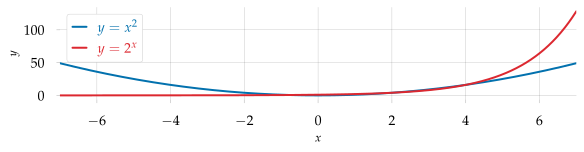

In [2]:
fig, ax = plt.subplots(figsize=figaspect(1./4))
x = np.linspace(-7, 7, num=1000)
ax.plot(x, x**2, label=r'$y=x^2$')
ax.plot(x, 2.0**x, label=r'$y=2^x$')
ax.legend(loc='upper left', labelcolor='linecolor')
ax.set_xlabel(r'$x$');
ax.set_ylabel(r'$y$');
glue('polyexp', fig, display=False)

Often, when we refer to an *exponential*, we really mean a specific base $e = 2.71828\dots$, known alternately as "Euler's number", or "the base of the natural logarithm".

## Rules for working with exponentials

```{eval-rst}
    .. index:: Exponentials ; rules
```

The following rules (properties) are useful when manipulating expressions involving exponentials.
All of these rules work for any base $c \neq 0$, including the special case $c=e$.

```{prf:property}
Any $c$ raised to the 0 power is 1, and specifically:

$$
c^0 = 1
$$
```

```{prf:property} Exponentials turn negatives into inverses:

$$
c^{-a} = \frac{1}{c^a}
$$

```

```{prf:property} Exponentials turn sums into products:

$$
c^{a}\cdot c^{b} = c^{a+b}
$$
```

```{prf:property} Exponentials turn products into powers:

$$
c^{a\cdot b} = {\left(c^a\right)}^b = {\left(c^b\right)}^a
$$
```

## The exponential function

```{eval-rst}
    .. index:: Exponential ; function
```

While it is convenient to regard $e$ as the number $2.71828\dots$, there is an alternative (and more general) definition for $e$ given by the following infinite summation

```{math}
:label: exp
e := \sum_{n=0}^\infty \frac{1}{n!}
```

where 

```{math}
n! := 1\cdot 2 \cdot 3 \cdot \dots \cdot n
```

is the *factorial* function: the product of numbers 1 through $n$.
(We define the special case $0! = 1$.)

The exponential function $e^x$, sometimes also written $\exp(x)$, is equivalent to the number $e$ raised to the $x$th power.

<Figure size 576x144 with 1 Axes>

<Figure size 576x144 with 1 Axes>

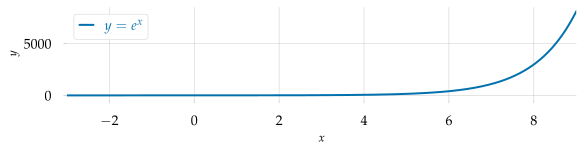

In [3]:
fig, ax = plt.subplots(figsize=figaspect(1./4))
x = np.linspace(-3, 9, num=1000)
ax.plot(x, np.exp(x), label=r'$y=e^x$')
ax.legend(loc='upper left', labelcolor='linecolor')
ax.set_xlabel(r'$x$');
ax.set_ylabel(r'$y$');
glue('exp', fig, display=False)

```{glue:figure} exp
:alt: Plot of the exponential function

The exponential function $e^x$.
```

Note that summation in {eq}`exp` depends on *infinitely* many terms, and is not something you could explicitly compute.
While this could be a problem in some cases, it's okay here because the terms diminish quite rapidly:

\begin{align*}
e = \sum_{n=0}^\infty \frac{1}{n!} &= \frac{1}{0!} + \frac{1}{1!} + \frac{1}{2!} + \frac{1}{3!} + \frac{1}{4!} + \frac{1}{5!} + \dots\\
&= \frac{1}{1} + \frac{1}{1} + \frac{1}{2} + \frac{1}{6} + \frac{1}{24} + \frac{1}{120} + \dots
\end{align*}

and the summation *converges* to Euler's number.
Proving this sort of thing is out of scope for us here, but we can simulate it computationally by printing out the first few partial sums with a bit of python code.

In [4]:
import numpy as np
from scipy.special import factorial

# Initialize the partial sum
e_partial = 0.0

for n in range(15):
    # Add in 1/n!
    e_partial += 1.0/factorial(n)
    print('First {:2d} term(s): {:0.12f}'.format(n+1, e_partial))
    
# Print the actual constant to 12 decimals
print('---')
print("Euler's constant: {:0.12f}".format(np.e))

First  1 term(s): 1.000000000000
First  2 term(s): 2.000000000000
First  3 term(s): 2.500000000000
First  4 term(s): 2.666666666667
First  5 term(s): 2.708333333333
First  6 term(s): 2.716666666667
First  7 term(s): 2.718055555556
First  8 term(s): 2.718253968254
First  9 term(s): 2.718278769841
First 10 term(s): 2.718281525573
First 11 term(s): 2.718281801146
First 12 term(s): 2.718281826198
First 13 term(s): 2.718281828286
First 14 term(s): 2.718281828447
First 15 term(s): 2.718281828458
---
Euler's constant: 2.718281828459


After only 15 terms of the summation, we already have a quite good approximation to $e$ (accurate to 11 decimal places).

This definition of $e$ as an infinite summation can be generalized to depend on an arbitrary exponent $x$:

$$
e^x := \sum_{n=0}^{\infty} \frac{x^n}{n!},
$$

where the first definition can be recovered by setting $x=1$ in the second equation.

While we rarely work with this form directly, it is useful because it provides a way to generalize the exponential to support *complex* exponents $e^z$ for $z\in\mathbb{C}$.

(logarithms)=
## Logarithms

Logarithms are the inverse of exponentials, similar to how square-root is the inverse of squaring.
In general, logarithms have a "base" $b > 0$, and define the following relationship for input $x > 0$:

```{math}
\log_b x = y \quad\quad \Leftrightarrow \quad\quad x = b^y.
```
Intuitively, $\log_b x$ measures the power $y$ we would need to raise $b$ to produce $x$.

When $x = 0$, there is no finite number $y$ such that $b^y = 0$, and we say $\log_b x = -\infty$.

The base can be any positive number, but among all logarithms, the **natural logarithm** (denoted $\ln$) uses $e$ as the base:
```{margin}
Why, exactly, base-$e$ is considered the most "natural" is a deep and fascinating topic, that we unfortunately do not have the space for here.
```
```{math}
\ln x = y \quad\quad \Leftrightarrow \quad\quad x = e^y.
```

Other common choices for the base are $b=2$ and $b=10$.
In these cases, $\log_2 x$ and $\log_{10} x$ can be roughly thought of as measuring the "number" of bits (for $b=2$) or digits (for $b=10$) needed to represent a number $x$.

<Figure size 576x144 with 1 Axes>

<Figure size 576x144 with 1 Axes>

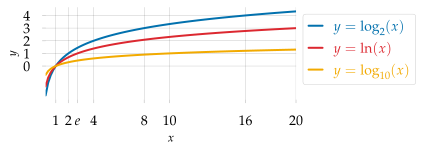

In [5]:
fig, ax = plt.subplots(figsize=figaspect(1./4))

x = np.linspace(20, 0, num=100, endpoint=False)[::-1]

ax.plot(x, np.log2(x), label=r'$y = \log_2(x)$')
ax.plot(x, np.log(x), label=r'$y = \ln(x)$')
ax.plot(x, np.log10(x), label=r'$y = \log_{10}(x)$')
ax.set(aspect=1, xlabel='$x$', ylabel='$y$',
        xticks=[1, 2, np.e, 4, 8, 10, 16, 20],
        xticklabels=[1, 2, '$e$', 4, 8, 10, 16, 20])
ax.set(yticks=[0, 1, 2, 3, 4])
#ax.set(ylim=[-2, 5])
ax.legend(loc='upper left', labelcolor='linecolor', bbox_to_anchor=(1, 1))
glue('log', fig, display=False)

```{glue:figure} log
:alt: Plot of logarithms with different bases (2, e, 10)

A comparison of the base-2, natural (base-$e$), and base-10 logarithms of $x$.
```

## Properties of logarithms

```{prf:property}
For any base $b > 0$, $\log_b 1 = 0$.  
```

This is just another way of writing $b^0 = 1$.


```{prf:property}
For any base $b>0$, $\log_b b = 1$.
```

This is another way of saying that $b^1 = b$.


```{prf:property}
$\log_b x = \frac{\ln x}{\ln b}$
```

This rule lets us convert between different logarithm bases.


```{prf:property}
For any $x$ and $y$, $\log_b(x\cdot y) = \log_b(x) + \log_b(y)$.
```

This rule allows us to turn products into sums, which can often be computed more easily and with greater precision.

As a corollary, we also get the analogous rule for ratios: $\log_b(x/y) = \log_b(x) - \log_b(y)$.


```{prf:property}
For any $k$, $\log_b(x^k) = k \cdot \log_b x$.
```
This is just a slight generalization of rule 4, allowing us to turn powers into products.
Note that $k$ need not be an integer, or positive: it works for any real number!

In particular, we have $\log_b \frac{1}{x} = \log_b \left(x^{-1}\right) = -\log_b x$.


```{prf:property}
$b^{\log_b x} = x$.
```
This is just notation that says $b^x$ and $\log_b x$ are mutual inverses.